## Rule Based Control

This example displays how to use rule-based control (RBC) to control a simple microgrid.

In rule-based control, modules are deployed in a preset order. You can either define this order by passing a priority list or the order will be defined automatically from the module with the lowest marginal cost to the highest.

#### Setting up the algorithm

Setting up a rule-based control algorithm in straightforward. Simply define your microgrid and pass it to the [pymgrid.algos.RuleBasedControl](../reference/api/algos/pymgrid.algos.RuleBasedControl.rst) class.

In [44]:
import pandas as pd

from matplotlib import pyplot as plt

from pymgrid import Microgrid
from pymgrid.algos import RuleBasedControl

In [5]:
microgrid = Microgrid.from_scenario(microgrid_number=0)
rbc = RuleBasedControl(microgrid)

Running the algorithm is straightforward:

In [9]:
rbc.reset()
rbc_result = rbc.run()

### Investigating the results

At this point, all the results are stored in the DataFrame `rbc_result`. We can investigate the costs of running the microgrid, the usages of the various modules, and so on.

Most of the cost of running the microgrid is from grid usage:

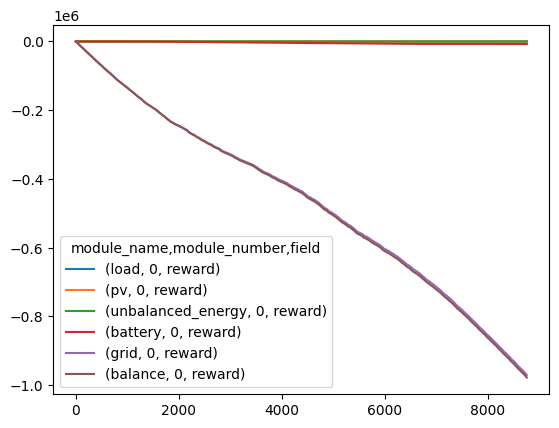

In [47]:
rbc_result.loc[:, pd.IndexSlice[:, :, 'reward']].cumsum().plot()
plt.show()

As we would hope, there are no excess costs due to overgeneration or loss load:

In [55]:
print(f"Total overgeneration or loss load costs over the course of the year:\n\
    {rbc_result.loc[:, pd.IndexSlice['unbalanced_energy', :, 'reward']].sum().item()}")

Total overgeneration or loss load costs over the course of the year:
    -3.0811264650765224e-10


In [66]:
days_in_month = [
    ('January', 31),
    ('February', 28),
    ('March', 31),
    ('April', 30),
    ('May', 31),
    ('June', 30),
    ('July', 31),
    ('August', 31),
    ('September', 30),
    ('October', 31),
    ('November', 30),
    ('December', 31)
]

month_start_end_dates = {days_in_month[0][0]: [0, 24 * days_in_month[0][1]]}

for month_n, (month, days_in) in enumerate(days_in_month[1:], start=1):
    last_end = month_start_end_dates[days_in_month[month_n-1][0]][-1]
    month_start_end_dates[month] = [last_end, 24 * days_in + last_end]

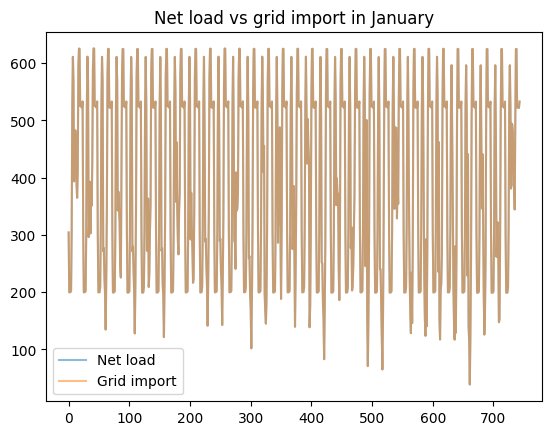

In [45]:
load_less_renewable_available = rbc_result[('load', 0, 'load_met')] - rbc_result[('pv', 0, 'renewable_current')]
grid_import = rbc_result[('grid', 0, 'grid_import')]

pd.concat([load_less_renewable_available, grid_import], 
          keys=['Net load', 'Grid import'], 
          axis=1).iloc[:744].plot(alpha=0.5, title='Net load vs grid import in January')

plt.show()